In [1]:
#importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lendo a base de dados de 2018 e removendo os campos nulos
df_2018 = pd.read_csv('2018.CSV', delimiter=';', encoding='utf-8')
df_2018 = df_2018.dropna()

In [3]:
#Lendo a base de dados de 2019 e removendo os campos nulos
df_2019 = pd.read_csv('2019.CSV', delimiter=';', encoding='utf-8')
df_2019= df_2019.dropna()

In [4]:
#Lendo a base de dados de 2020 e removendo os campos nulos
df_2020 = pd.read_csv('2020.CSV', delimiter=';', encoding='utf-8')
df_2020 = df_2020.dropna()

In [5]:
#Lendo a base de dados de 2021 e removendo os campos nulos
df_2021 = pd.read_csv('2021.CSV', delimiter=';', encoding='utf-8')
df_2021 = df_2021.dropna()

In [6]:
#Lendo a base de dados de 2022 e removendo os campos nulos
df_2022 = pd.read_csv('2022.CSV', delimiter=';', encoding='utf-8')
df_2022 = df_2022.dropna()

In [7]:
#Lendo a base de dados de 2023 e removendo os campos nulos
df_2023 = pd.read_csv('2023.CSV', delimiter=';', encoding='utf-8')
df_2023 = df_2023.dropna()

In [8]:
#Lendo a base de dados de 2024 e removendo os campos nulos
df_2024 = pd.read_csv('2024.CSV', delimiter=';', encoding='utf-8')
df_2024 =  df_2024.dropna()

In [9]:
#Fazendo as junção das bases usando a função concat
df_combinado_financeiro = pd.concat([df_2018, df_2019,df_2020,df_2021,df_2022,df_2023,df_2024], ignore_index=True)
df_combinado_financeiro

,Data,Vencimento,Comanda,Categoria,Descrição,Realizado,Valor
0,01/04/2018,01/04/2018,5.0,Pagamento,Dinheiro,Sim,"R$ 100,00"
1,01/04/2018,01/04/2018,4.0,Pagamento,Dinheiro,Sim,"R$ 100,00"
2,06/04/2018,06/04/2018,6.0,Pagamento,Crédito Visa Master 1x,Sim,"R$ 102,00"
3,10/04/2018,12/04/2018,17.0,Pagamento,Cartão de Débito,Sim,"R$ 30,00"
4,10/04/2018,11/04/2018,9.0,Pagamento,Débito Visa Master,Sim,"R$ 110,00"
...,...,...,...,...,...,...,...
8195,09/01/2024,09/01/2024,13417.0,Pagamento,Link mercado pago - 3x antec.,Não,"R$ 561,80"
8196,09/01/2024,09/01/2024,13416.0,Pagamento,Link mercado pago,Não,"R$ 330,00"
8197,09/01/2024,09/01/2024,13413.0,Pagamento,Ton visa e master crédito 1x,Não,"R$ 170,00"
8198,08/12/2023,08/01/2024,13359.0,Pagamento,Ton visa/master parcelado - 2/3,Não,"R$ 58,33"


In [10]:
#Transformando a coluna 'Data' em datetime
df_combinado_financeiro['Data'] = pd.to_datetime(df_combinado_financeiro['Data'], errors='coerce',dayfirst=True)

In [11]:
#Transformando a coluna 'Vencimento em datetime
df_combinado_financeiro['Vencimento'] = pd.to_datetime(df_combinado_financeiro['Vencimento'], errors='coerce',dayfirst=True)

In [12]:
#Transformando a coluna 'Comanda' em to_numeric e convertendo para int com astype(int)
df_combinado_financeiro['Comanda'] = pd.to_numeric(df_combinado_financeiro['Comanda'], errors='coerce').astype(int)

In [13]:
#Limpando a coluna 'Valor removendo o 'R$' e substituindo o ',' por '.'
df_combinado_financeiro['Valor'] = df_combinado_financeiro['Valor'].str.replace('R$','')
df_combinado_financeiro['Valor'] = df_combinado_financeiro['Valor'].str.replace(',','.')


In [14]:
#Transformando a coluna 'Valor' em to_numeric
df_combinado_financeiro['Valor'] = pd.to_numeric(df_combinado_financeiro['Valor'], errors='coerce')

In [15]:
#verificando a df_combinado_financeiro
df_combinado_financeiro

,Data,Vencimento,Comanda,Categoria,Descrição,Realizado,Valor
0,2018-04-01,2018-04-01,5,Pagamento,Dinheiro,Sim,100.00
1,2018-04-01,2018-04-01,4,Pagamento,Dinheiro,Sim,100.00
2,2018-04-06,2018-04-06,6,Pagamento,Crédito Visa Master 1x,Sim,102.00
3,2018-04-10,2018-04-12,17,Pagamento,Cartão de Débito,Sim,30.00
4,2018-04-10,2018-04-11,9,Pagamento,Débito Visa Master,Sim,110.00
...,...,...,...,...,...,...,...
8195,2024-01-09,2024-01-09,13417,Pagamento,Link mercado pago - 3x antec.,Não,561.80
8196,2024-01-09,2024-01-09,13416,Pagamento,Link mercado pago,Não,330.00
8197,2024-01-09,2024-01-09,13413,Pagamento,Ton visa e master crédito 1x,Não,170.00
8198,2023-12-08,2024-01-08,13359,Pagamento,Ton visa/master parcelado - 2/3,Não,58.33


In [16]:
#Verificando se a campos nulos 
df_combinado_financeiro.isnull().sum()

Data           0
Vencimento     0
Comanda        0
Categoria      0
Descrição      0
Realizado      0
Valor         51
dtype: int64

In [17]:
#Verificando os tipos de dados de cada coluna
df_combinado_financeiro.dtypes

Data          datetime64[ns]
Vencimento    datetime64[ns]
Comanda                int64
Categoria             object
Descrição             object
Realizado             object
Valor                float64
dtype: object

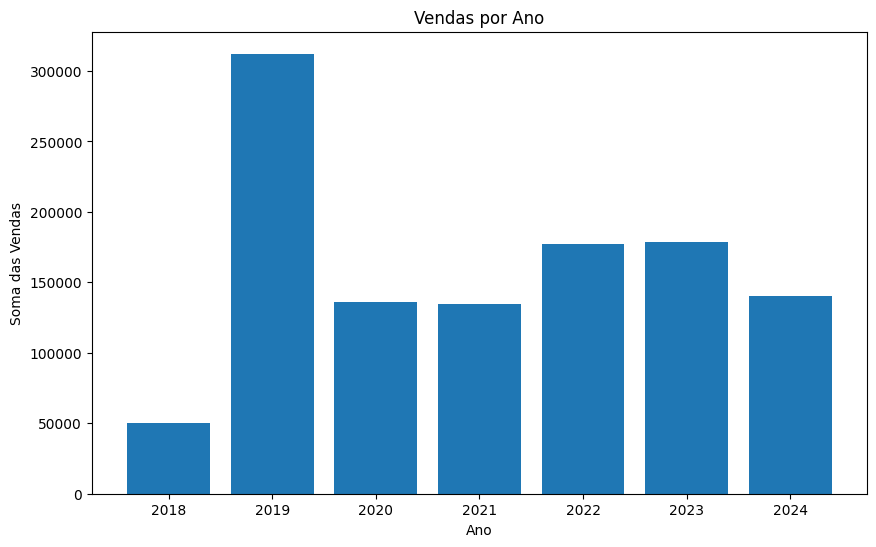

In [18]:
#Filtrando a data pegando apenas o ano
df_data = df_combinado_financeiro['Data'].dt.year

#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# Agrupando os dados por ano e calculando a soma das vendas
df_grouped = df_combinado_financeiro.groupby(df_data)['Valor'].sum()

# Criando o gráfico de barras
plt.bar(df_grouped.index, df_grouped.values)
plt.xlabel('Ano')
plt.ylabel('Soma das Vendas')
plt.title('Vendas por Ano')
plt.show()

In [19]:
#Lendo os dados do banco de dados 'pacientes1'
df_pacientes1 = pd.read_csv('pacientes1.CSV', delimiter=';', encoding='latin')
df_pacientes1.head()

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,7847,NaN,NaN,NaN,NaN,0,170,1,13/07/2024
1,7939,NaN,NaN,NaN,NaN,0,0,1,30/08/2024
2,7869,NaN,NaN,NaN,NaN,0,170,1,24/07/2024
3,7652,NaN,NaN,NaN,Feminino,0,159,1,27/03/2024
4,4411,NaN,NaN,NaN,NaN,0,130,1,02/05/2021


In [20]:
#Lendo os dados do banco de dados 'pacientes2'
df_pacientes2 = pd.read_csv('pacientes2.CSV', delimiter=';', encoding='latin')
df_pacientes2.head()

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,4970,NaN,NaN,NaN,Feminino,"R$ 38,00","R$ 2.000,00",9,22/10/2021
1,7071,NaN,NaN,NaN,Feminino,"R$ 0,00",237.5,1,24/05/2023
2,4236,NaN,NaN,NaN,Feminino,"R$ 0,00","R$ 0,00",1,10/12/2020
3,3860,São Paulo,SP,23/10/1977,Feminino,"R$ 0,00",1012.9,14,09/04/2022
4,4720,NaN,NaN,NaN,Feminino,"R$ 0,00","R$ 0,00",1,16/06/2021


In [21]:
#Fazendo a junção dos dois bancos com a função concat
df_combinado_pacientes = pd.concat([df_pacientes1, df_pacientes2], ignore_index=True)
df_combinado_pacientes

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,7847,NaN,NaN,NaN,NaN,0,170,1,13/07/2024
1,7939,NaN,NaN,NaN,NaN,0,0,1,30/08/2024
2,7869,NaN,NaN,NaN,NaN,0,170,1,24/07/2024
3,7652,NaN,NaN,NaN,Feminino,0,159,1,27/03/2024
4,4411,NaN,NaN,NaN,NaN,0,130,1,02/05/2021
...,...,...,...,...,...,...,...,...,...
7199,7702,NaN,NaN,NaN,NaN,"R$ 0,00","R$ 500,00",2,20/04/2024
7200,7704,NaN,NaN,NaN,Feminino,"R$ 0,00","R$ 185,00",1,20/04/2024
7201,6678,São Bernardo do Campo,SP,NaN,Feminino,"R$ 0,00","R$ 624,00",1,20/02/2023
7202,5694,NaN,NaN,NaN,NaN,"R$ 0,00",237.5,2,12/01/2022


In [22]:
#Transformando a coluna'Data de Nascimento' para datetime
df_combinado_pacientes['Data de Nascimento'] = pd.to_datetime(df_combinado_pacientes['Data de Nascimento'], errors='coerce',dayfirst=True)

In [23]:
#Limpando a coluna "Saldo" removendo o 'R$' e substituindo o ',' por '.'
df_combinado_pacientes['Saldo'] = df_combinado_pacientes['Saldo'].str.replace('R$','')
df_combinado_pacientes['Saldo'] = df_combinado_pacientes['Saldo'].str.replace(',','.')

In [24]:
#Transofrmando a coluna 'Saldo' em to_numeric
df_combinado_pacientes['Saldo'] = pd.to_numeric(df_combinado_pacientes['Saldo'], errors='coerce')

In [25]:
#Limpando a coluna "Faturado" removendo o 'R$' e substituindo o ',' por '.'
df_combinado_pacientes['Faturado'] = df_combinado_pacientes['Faturado'].str.replace('R$','')
df_combinado_pacientes['Faturado'] = df_combinado_pacientes['Faturado'].str.replace(',','.')

In [26]:
#Transofrmando a coluna 'Faturado' em to_numeric
df_combinado_pacientes['Faturado'] = pd.to_numeric(df_combinado_pacientes['Faturado'], errors='coerce')

In [27]:
#Verificando os tipos de dados de cada coluna
df_combinado_pacientes.dtypes

Código                         int64
Cidade                        object
Estado                        object
Data de Nascimento    datetime64[ns]
Sexo                          object
Saldo                        float64
Faturado                     float64
Visitas                        int64
Ultima Visita                 object
dtype: object

In [28]:
#verificando a df_combinado_pacientes
df_combinado_pacientes

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita
0,7847,NaN,NaN,NaT,NaN,0.0,170.0,1,13/07/2024
1,7939,NaN,NaN,NaT,NaN,0.0,0.0,1,30/08/2024
2,7869,NaN,NaN,NaT,NaN,0.0,170.0,1,24/07/2024
3,7652,NaN,NaN,NaT,Feminino,0.0,159.0,1,27/03/2024
4,4411,NaN,NaN,NaT,NaN,0.0,130.0,1,02/05/2021
...,...,...,...,...,...,...,...,...,...
7199,7702,NaN,NaN,NaT,NaN,0.0,500.0,2,20/04/2024
7200,7704,NaN,NaN,NaT,Feminino,0.0,185.0,1,20/04/2024
7201,6678,São Bernardo do Campo,SP,NaT,Feminino,0.0,624.0,1,20/02/2023
7202,5694,NaN,NaN,NaT,NaN,0.0,237.5,2,12/01/2022


In [29]:
#Transformando a coluna 'ultima Visita em datetime
df_combinado_pacientes['Ultima Visita'] = pd.to_datetime(df_combinado_pacientes['Ultima Visita'], errors='coerce',dayfirst=True)

In [30]:
#Substituindo os campos nulos por 0 na coluna 'Saldo'
df_combinado_pacientes['Saldo'] = df_combinado_pacientes['Saldo'].fillna(0)

In [31]:
#Substituindo os campos nulos por 0 na coluna "Faturado"
df_combinado_pacientes['Faturado'] = df_combinado_pacientes['Faturado'].fillna(0)

In [32]:
from datetime import datetime
data_atual = datetime.now()
# df_combinado_pacientes = df_combinado_pacientes['Tempo de ausência'].astype(int)

df_combinado_pacientes['Tempo de ausência'] = (data_atual - df_combinado_pacientes['Ultima Visita']).dt.days

In [33]:
#Substituindo os campos vazios por 0 e transformando o resultado em (int)
df_combinado_pacientes['Tempo de ausência'] = df_combinado_pacientes['Tempo de ausência'].fillna(0)
df_combinado_pacientes['Tempo de ausência'] = df_combinado_pacientes['Tempo de ausência'].astype(int)

In [34]:
# Criando a coluna idade, calculando a idade apartir da coluna 'Data de nascimento'.
from datetime import date
def calcular_idade(nascimento):
    hoje = date.today()
    return hoje.year - nascimento.year - ((hoje.month, hoje.day) < (nascimento.month, nascimento.day))

df_combinado_pacientes['Idade'] = df_combinado_pacientes['Data de Nascimento'].apply(calcular_idade)

In [35]:
df_combinado_pacientes['Idade'] = df_combinado_pacientes['Idade'].fillna(0)

In [36]:
# #Substituindo os campos vazios por 0 e transformando o resultado em (int)
df_combinado_pacientes['Cidade'] = df_combinado_pacientes['Cidade'].fillna('Sem preenchimento')
df_combinado_pacientes['Estado'] = df_combinado_pacientes['Estado'].fillna('Sem preenchimento')
df_combinado_pacientes['Data de Nascimento'] = df_combinado_pacientes['Data de Nascimento'].fillna('Sem preenchimento')
df_combinado_pacientes['Sexo'] = df_combinado_pacientes['Sexo'].fillna('Sem preenchimento')


In [37]:
#Criando a faixa etária de idade 

df_combinado_pacientes.loc[df_combinado_pacientes['Idade'] == 0 , 'grupo_idade'] = 'Sem preenchimento'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 25) & (df_combinado_pacientes['Idade'] < 30), 'grupo_idade'] = '15-19'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 25) & (df_combinado_pacientes['Idade'] < 30), 'grupo_idade'] = '20-24'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 25) & (df_combinado_pacientes['Idade'] < 30), 'grupo_idade'] = '25-29'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 30) & (df_combinado_pacientes['Idade'] < 35), 'grupo_idade'] = '30-34'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 35) & (df_combinado_pacientes['Idade'] < 40), 'grupo_idade'] = '35-39'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 40) & (df_combinado_pacientes['Idade'] < 45), 'grupo_idade'] = '40-44'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 45) & (df_combinado_pacientes['Idade'] < 50), 'grupo_idade'] = '45-49'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 50) & (df_combinado_pacientes['Idade'] < 55), 'grupo_idade'] = '50-54'
df_combinado_pacientes.loc[(df_combinado_pacientes['Idade'] >= 55) & (df_combinado_pacientes['Idade'] < 60), 'grupo_idade'] = '55-59'
df_combinado_pacientes.loc[df_combinado_pacientes['Idade'] >= 60, 'grupo_idade'] = '60+'
df_combinado_pacientes.head(100)

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita,Tempo de ausência,Idade,grupo_idade
0,7847,Sem preenchimento,Sem preenchimento,Sem preenchimento,Sem preenchimento,0.0,170.0,1,2024-07-13,83,0.0,Sem preenchimento
1,7939,Sem preenchimento,Sem preenchimento,Sem preenchimento,Sem preenchimento,0.0,0.0,1,2024-08-30,35,0.0,Sem preenchimento
2,7869,Sem preenchimento,Sem preenchimento,Sem preenchimento,Sem preenchimento,0.0,170.0,1,2024-07-24,72,0.0,Sem preenchimento
3,7652,Sem preenchimento,Sem preenchimento,Sem preenchimento,Feminino,0.0,159.0,1,2024-03-27,191,0.0,Sem preenchimento
4,4411,Sem preenchimento,Sem preenchimento,Sem preenchimento,Sem preenchimento,0.0,130.0,1,2021-05-02,1251,0.0,Sem preenchimento
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4102,Taboão da Serra,SP,1990-12-29 00:00:00,Masculino,0.0,144.5,1,2020-10-31,1434,33.0,30-34
96,7741,Sem preenchimento,Sem preenchimento,Sem preenchimento,Masculino,0.0,170.0,1,2024-05-14,143,0.0,Sem preenchimento
97,2678,Sem preenchimento,Sem preenchimento,1989-03-10 00:00:00,Masculino,0.0,99.9,1,2019-09-17,1844,35.0,35-39
98,1074,São Paulo,SP,1986-11-27 00:00:00,Masculino,0.0,309.5,2,2021-07-24,1168,37.0,35-39


In [38]:
df_combinado_pacientes.dtypes

Código                         int64
Cidade                        object
Estado                        object
Data de Nascimento            object
Sexo                          object
Saldo                        float64
Faturado                     float64
Visitas                        int64
Ultima Visita         datetime64[ns]
Tempo de ausência              int64
Idade                        float64
grupo_idade                   object
dtype: object

In [39]:
df_combinado_pacientes.isna().sum()

Código                  0
Cidade                  0
Estado                  0
Data de Nascimento      0
Sexo                    0
Saldo                   0
Faturado                0
Visitas                 0
Ultima Visita         834
Tempo de ausência       0
Idade                   0
grupo_idade           103
dtype: int64

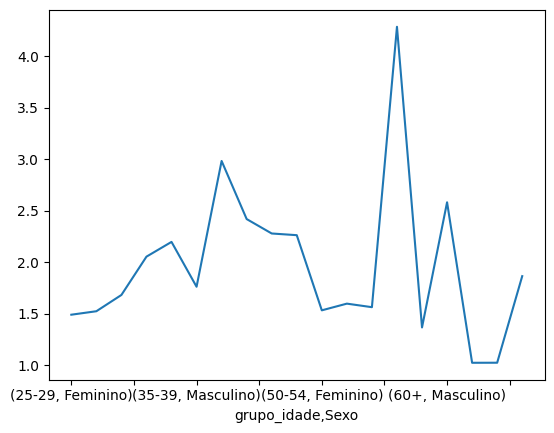

In [50]:
#Média de visita por genêro e faixa etária
visitas_por_grupo = df_combinado_pacientes.groupby(['grupo_idade', 'Sexo'])['Visitas'].mean()
visitas_por_grupo.plot()
plt.show()
# visitas_por_grupo


In [41]:
# Agrupa por faixa etária e calcula o gasto médio por faixa etária e genêrp
#1. Qual é o perfil do cliente ideal? Publico alvo
gastos_por_idade = df_combinado_pacientes.groupby(['grupo_idade','Sexo'])['Faturado'].mean()
print(gastos_por_idade)


grupo_idade        Sexo             
25-29              Feminino             177.858563
                   Masculino            164.171263
30-34              Feminino             191.950778
                   Masculino            183.027207
35-39              Feminino             233.981562
                   Masculino            177.834792
40-44              Feminino             288.750924
                   Masculino            261.362386
45-49              Feminino             242.775427
                   Masculino            169.250566
50-54              Feminino             154.073860
                   Masculino            165.113200
55-59              Feminino             179.126970
                   Masculino            407.401429
60+                Feminino             156.667315
                   Masculino            141.584722
Sem preenchimento  Feminino             127.741694
                   Masculino             98.418975
                   Sem preenchimento    192.9

In [42]:
df_combinado_pacientes['Tempo de ausência'].mode()

0    0
Name: Tempo de ausência, dtype: int64

In [43]:
df_combinado_pacientes.head(1)

,Código,Cidade,Estado,Data de Nascimento,Sexo,Saldo,Faturado,Visitas,Ultima Visita,Tempo de ausência,Idade,grupo_idade
0,7847,Sem preenchimento,Sem preenchimento,Sem preenchimento,Sem preenchimento,0.0,170.0,1,2024-07-13,83,0.0,Sem preenchimento


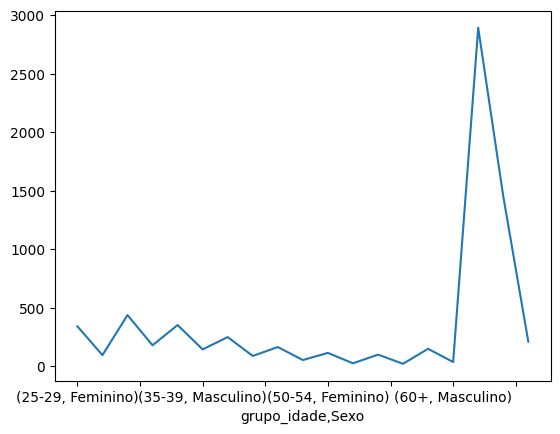

In [51]:
# Agrupando por múltiplas colunas e calculando a média de 'Faturado'
visitas_por_mes = df_combinado_pacientes.groupby(['grupo_idade', 'Sexo'])['Faturado'].count()
visitas_por_mes.plot()
plt.show()


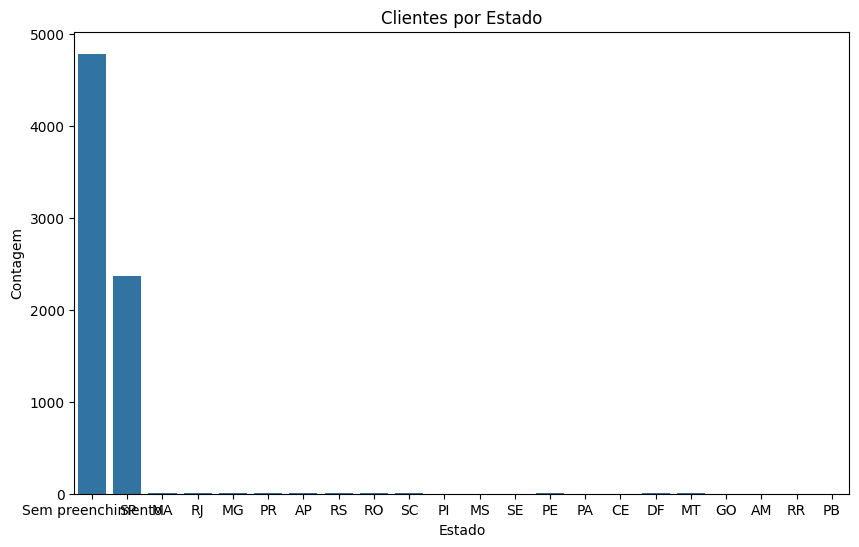

In [45]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_combinado_pacientes,
              x = 'Estado')

# definir o título e eixos x e y
plt.title('Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')

plt.show()

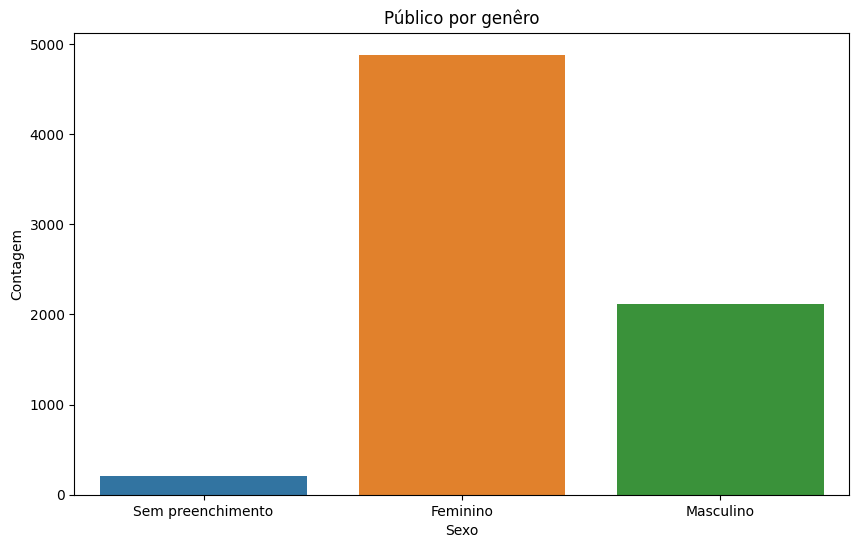

In [52]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_combinado_pacientes,
              x = 'Sexo',
              hue = 'Sexo')

# definir o título e eixos x e y
plt.title('Público por genêro')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

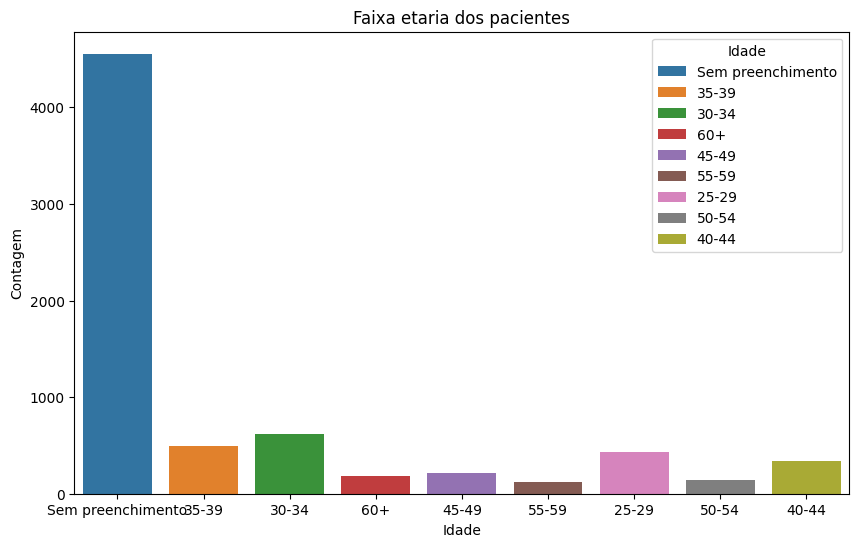

In [47]:
#Definindo tamanho do gráfico
plt.figure(figsize=(10, 6))

# instanciar o tipo de plotagem
sns.countplot(data = df_combinado_pacientes,
              x = 'grupo_idade',
              hue = 'grupo_idade')

# definir o título e eixos x e y
plt.title('Faixa etaria dos pacientes')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# definir texto da legenda
plt.legend(title = 'Idade')
plt.show()

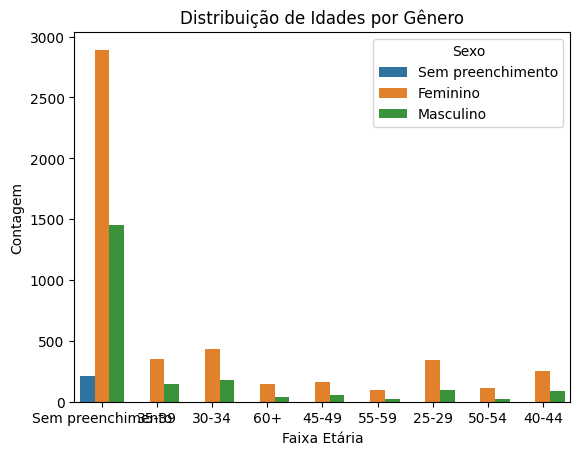

In [48]:
# Gráfico da distribuição da faixa etária por genêro
sns.countplot(x='grupo_idade', hue='Sexo', data=df_combinado_pacientes)
plt.title('Distribuição de Idades por Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.show()

In [49]:
# Exportando a base final em csv
df_combinado_financeiro.to_csv('Base_final_Financeiro.csv',index=False)
df_combinado_pacientes.to_csv('Base_final_Pacientes.csv',index=False)